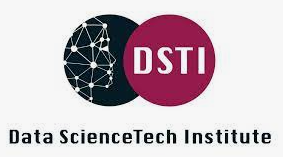

# Project Summary

Nowadays with so many books available, it can be hard to select the best ones to read. The dataset provided is a curation of Goodreads books based on real user information. It can be used for many tasks like predicting a book’s rating or recommending new books.



# Project Objectives

Using the provided dataset, you are asked to train a model that predicts a book’s rating. The project can be submitted as a Jupyter Notebook and should include exploratory analysis of the data, feature engineering and selection, model training and evaluation.

# Prerequis - How to run the project

1.   Clone the GitHub "main_branch" repository in your computer, or download the zip
2.   Add The repository to your Google Drive account in order to have the full folder arborescence in your Google Colab workspace
3.   Open a Google Colab session and browse to the repository
4.   Start to execute the notebook called "main.ipynb" in the repository

# Project Code



## Add libraries

**Note:** For Google Colab, please upload the "requirements.txt" file into the current Colab workspace and run the following command in order to import all the dependencies.



In [1]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import *
import keras

## Data Preparation

### Import dataset

Note : Firstly, we open the csv file and we observe the following shape with delimiter = ',' : (11128 * 12)

In [3]:
#url = 'https://raw.githubusercontent.com/clemcoste/DSTI_ML_with_Python_Project/main_branch/data/raw/books.csv'

url = 'data/raw/books.csv'

# Check if the dataset is consistent before dataframe creation
#df = pd.read_csv(url, sep=',', index_col="bookID")

There is at least one row (3350) which has more than 12 columns after parsing the dataset with the comma delimiter. After observation, it is related to the fact that there is a comma in the "authors" field, which results in a 13 columns shape. So it means we have to import the dataset, check how many errors of this type are present and then conclude.

In [4]:
# Store the dataset in a Pandas Dataframe and filter bad lines
df_raw = pd.read_csv(url, sep=",", on_bad_lines='skip')

# Local file (offline mode)
#df_raw = pd.read_csv("books.csv", sep=",", index_col="bookID", on_bad_lines='skip')
#df_raw = pd.read_csv("books.csv", sep=",", on_bad_lines='skip')

df_raw.shape

(11123, 12)

We observe that there are 5 rows where dropped in total (0,04% of the dataset).
It is acceptable to continue with this filtered dataset.
Let's now check that there is no NaN values in the dataset :

In [5]:
df_raw.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

No more "*NaN*" observed, we can start the data understanding and exploration part.

## Data understanding & exploration

Let's display the info of the dataframe in order to have the different datatypes here:


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


The different datatypes we can find in the dataset are :

*   int64
*   object
*   float64



Let's display the head and observe the different fields.

In [7]:
df_raw.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Let's now display the tail and check that we have 11122 rows (11123 - header)

In [8]:
df_raw.tail(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


Below is the information you have regarding the dataset attributes:
1.   bookID: A unique identification number for each book.
2.   title: The name under which the book was published.
3.   authors: The names of the authors of the book. Multiple authors are delimited by
“/”.
4.   average_rating: The average rating of the book received in total.
5.   isbn: Another unique number to identify the book, known as the International
Standard Book Number.
6.   isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
7.   language_code: Indicates the primary language of the book. For instance, “eng” is standard for English.
8.   num_pages: The number of pages the book contains.
9.   ratings_count: The total number of ratings the book received.
10.   text_reviews_count: The total number of written text reviews the book received.
11.   publication_date: The date the book was published.
12.   publisher: The name of the book publisher.

We can have a view with the describe function in order to have an idea of the mean, count, min or max values for example, concerning the numeric values of the dataset.

Here for example with the describe method, all the variables are relevant except for the ISBN code which is an ID.

In [9]:
df_raw.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Something that can be interesting is to plot the different ratings in order to have an overview.

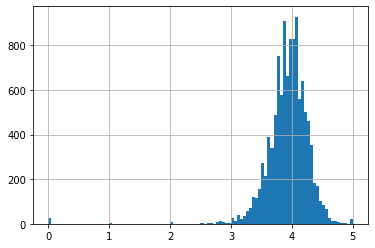

In [10]:
df_raw['average_rating'].hist(bins=100)

We can observe here the notes are mainly contained between 3 and 5, with an average rating of 3.93.

Something interesting can be to display the top10 books based on ratings. Let's have a first try, based on sort values:

In [11]:
df_raw[["title","average_rating","ratings_count"]].sort_values(by=['ratings_count', 'average_rating'], ascending=[False, False]).head(10)

,title,average_rating,ratings_count
10336,Twilight (Twilight #1),3.59,4597666
1697,The Hobbit or There and Back Again,4.27,2530894
1462,The Catcher in the Rye,3.80,2457092
307,Angels & Demons (Robert Langdon #1),3.89,2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585
4415,Harry Potter and the Chamber of Secrets (Harry...,4.42,2293963
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
23,The Fellowship of the Ring (The Lord of the Ri...,4.36,2128944
2114,Animal Farm,3.93,2111750
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690


We can't trust this kind of sorting, as the ratings_count will always take the lead on the average_rating. Moreover, we do not take into account here that the best book is a book with a high score, but also with a lot of reviews. For example, I think that "Harry Potter and the Half-Blood Prince" (average_rating = 4.57 / ratings_count = 2095690) should be higher in the top 10, as the number of ratings_count is very similar to the Animal Farm for example (average_rating = 3.93 / ratings_count = 2111750), but the average_rating is much higher than 3.93 for the Animal Farm.
I conclude we should use a Weighted Rating.
After some quick researches, I saw that the iMDB website (close to AlloCiné in France) applies this kind to weighted calculation for ratings in order to be relevant and propose a pertinent ranking.

Here is the formula used by iMDB:

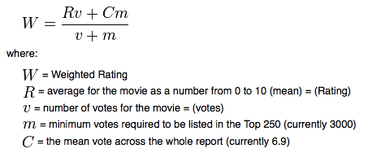

The following apply:
- v is the number of votes garnered by the book
- m is the minimum number of votes required for the book to be in the chart (the prerequisite)
- R is the mean rating of the book
- C is the mean rating of all the books in the dataset

We have the values for v and R for every book in the form of the ratings_count and average_rating features respectively. Calculating C and m is done by the following code :

In [12]:
C = df_raw['average_rating'].mean()
C

3.9340753393868564

In [13]:
m = df_raw['ratings_count'].quantile(0.85)
m

12959.59999999997

In [14]:
# Function to compute the weighted rating for each book
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['average_rating']
    ## Compute the weighted score
    return (v/(v+m) * R) + (m/(m+v) * C)

We can apply the *weighted_rating* function and observe the top 10 ranking of our dataset:

In [15]:
WR = df_raw.apply(weighted_rating, axis=1)
df_WR = df_raw.assign(Weighted_Rating = WR)
WR_plot = df_WR.sort_values(by='Weighted_Rating', ascending=False).head(10)
WR_plot

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Weighted_Rating
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,4.578431
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.566092
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,0740748475,9780740748479,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing,4.565836
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4.556552
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,9/25/2012,Ballantine Books,4.515560
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,4.486674
4244,15195,The Complete Maus,Art Spiegelman,4.55,0141014083,9780141014081,eng,296,111475,5966,10/2/2003,Penguin Books,4.485853
6588,24813,The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson,4.63,0836204387,9780836204384,eng,208,49122,368,9/5/1995,Andrews McMeel Publishing,4.484725
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,4.479649
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,0836221362,9780836221367,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing,4.469413


We can now observe that the final result is more convenient.

Note : Some of the best books are actually collection and boxed set => we will have to filter them after.

Ex : 
*   Harry Potter **Collection** (Harry Potter #1-6) 
*   J.R.R. Tolkien 4-Book **Boxed Set**
*   ...

Let's now display the top 10 ranking we just get:

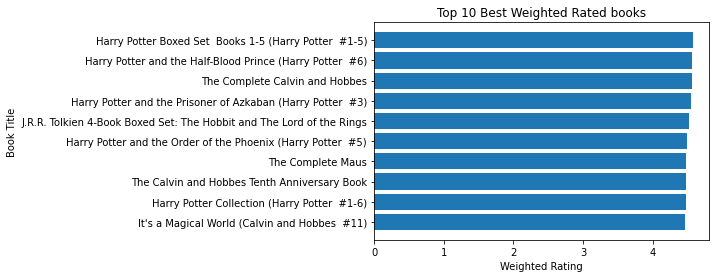

In [16]:
bars = WR_plot['title']
height = WR_plot['Weighted_Rating']
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)

# Display labels and title
plt.title("Top 10 Best Weighted Rated books")
plt.xlabel("Weighted Rating")
plt.ylabel("Book Title")

# Save the plot
plt.savefig('reports/figures/top_10_best_weighted_rated_books.png', bbox_inches='tight', dpi=100)

# Show graphic
plt.gca().invert_yaxis()
plt.show()

By observing the different dataset columns, we observe that we have several languages in the dataset. It can be interesting to display them and their respective proportion in order to have an overview:

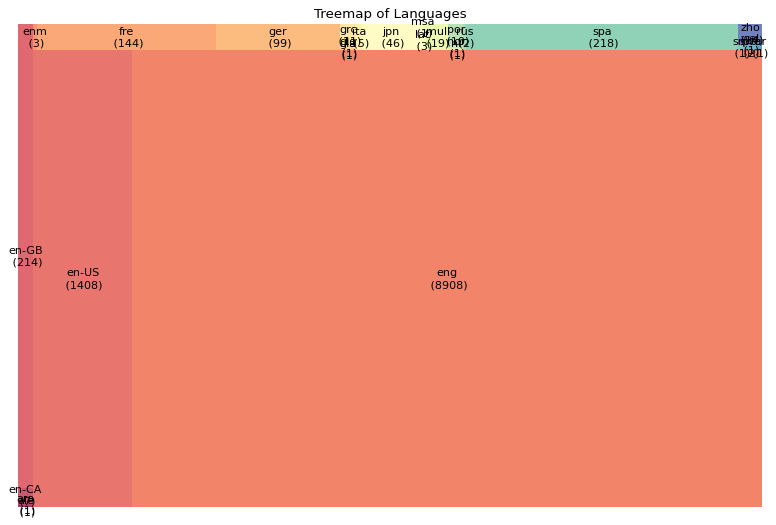

In [17]:
# Prepare Data
df_squarify = df_raw.groupby('language_code').size().reset_index(name='counts')
labels = df_squarify.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_squarify['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Display labels and title 
plt.title('Treemap of Languages')
plt.axis('off')

# Save the plot
plt.savefig('reports/figures/languages_treemap.png', dpi=200)

# Show graphic
plt.show()



Be inspired by : [matplotlib top50 plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#15.-Ordered-Bar-Chart)

We can that most of the books are written in english, but some of them are written in different english versions (canadian, ...).

This could be filtered later to simplify the dataset.

While observing the dataset, I had some a priori about the impact of some parameters. For example, I thought that large books should be impacted in the ratings: in my opinion largest books will have a lower rating based on the fact that large books can bore people.
Let's verify it:

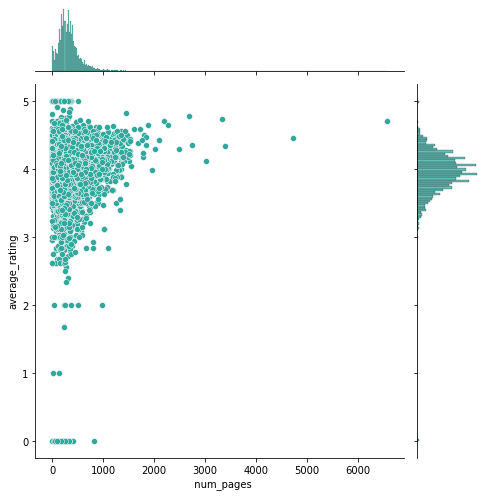

In [18]:
plot = sns.jointplot(data=df_raw, x="  num_pages", y="average_rating", color = '#32a89d', sizes=(100, 200), height=7)

# Save the plot
plt.savefig('reports/figures/jointplot_AverageRating_NumPages.png', dpi=200)

Is rating impacted by book size ? It seems that it is not the case, as when book size increases, the ratings are actually going higher.

Here we can also check :
- review count depending of the book size

My opinion: bigger is the book, lower the number of reviews will be.

Let's verify:

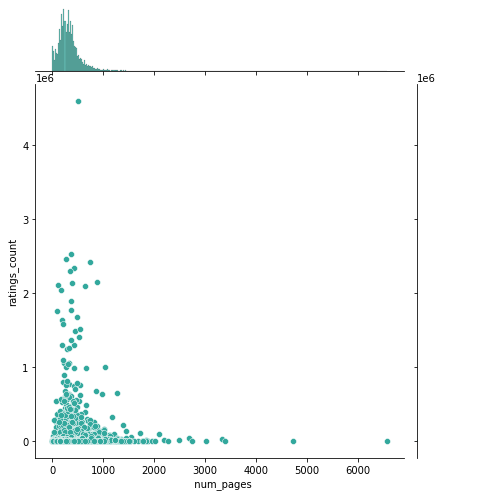

In [19]:
plot = sns.jointplot(data=df_raw, x="  num_pages", y="ratings_count", color = '#32a89d', sizes=(100, 200), height=7)

# Save the plot
plt.savefig('reports/figures/jointplot_RatingCount_NumPages.png', dpi=200)

This time I was right as we can see that larger the book is, and lower the number of reviews will be.

Now, let's talk about Pair plot.

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

This way, we can easily check for dependencies between some variables:

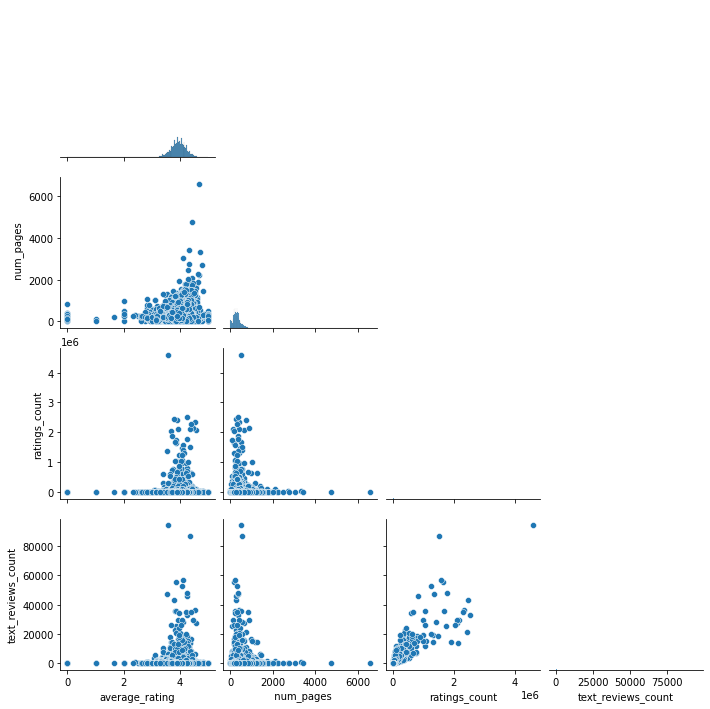

In [20]:
sns.pairplot(df_raw, x_vars=["average_rating", "  num_pages", "ratings_count", "text_reviews_count"],
    y_vars=["average_rating", "  num_pages", "ratings_count", "text_reviews_count"], corner=True)

# Save the plot
plt.savefig('reports/figures/pairplot.png', dpi=200)

We can observe that there is a correlation between "*text_reviews_count*" and "*ratings_count*".

This is actually quite understandable as most of the time, commercial website reviews are both a notation and a text review.

At that point, I have a clear overview of the dataset. We can start to apply some cleaning to it.

## Data cleaning

#### Clean column names

The "*num_pages*" attribute introduces some blank space in the name. We can start by removing them:

In [21]:
print('List of columns before cleaning:', df_raw.columns)
df_rename = df_raw.rename(columns={'  num_pages': 'num_pages'})
print('List of columns after cleaning:', df_rename.columns)
print('Shape : ', df_rename.shape)

List of columns before cleaning: Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')
List of columns after cleaning: Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')
Shape :  (11123, 12)


#### Delete collection and books set

In [22]:
# Filter Collection and Boxed
searchfor = ['Collection', 'Boxed']
df_filtCol = df_rename[~df_rename.title.str.contains('|'.join(searchfor))]
df_filtCol

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


Here is the list of filtered books:

In [23]:
df_rename[df_rename.title.str.contains('|'.join(searchfor))]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,9/25/2012,Ballantine Books
1053,3579,The Complete Anne of Green Gables Boxed Set (A...,L.M. Montgomery,4.43,0553609416,76783609419,eng,2088,98611,1447,10/6/1998,Starfire
1237,4263,My Favorite Year: A Collection of Football Wri...,Nick Hornby/D.J. Taylor/Huw Richards/Chris Pie...,3.68,0753814412,9780753814413,eng,288,393,4,8/1/2001,Orion Publishing
1325,4651,The Ernest Hemingway Audio Collection,Ernest Hemingway/Charlton Heston,4.30,0694524980,9780694524983,en-US,4,43,6,5/8/2001,Caedmon
1844,6544,The Scarpetta Collection: All That Remains / C...,Patricia Cornwell,4.16,074325581X,9780743255813,eng,672,30,2,11/11/2003,Scribner
1884,6680,Gumbo Ya-Ya: A Collection of Louisiana Folk Tales,Lyle Saxon/Edward Dreyer/Robert Tallant,4.04,0882896458,9780882896458,eng,640,307,23,5/31/1987,Pelican Publishing
2123,7664,A New Collection of Three Complete Novels: Con...,Michael Crichton,3.99,0517101351,9780517101353,eng,720,960,27,3/6/1994,Wings Books
2129,7674,The Michael Crichton Collection: Airframe / Th...,Michael Crichton/Stephen Lang/Anthony Heald/Bl...,4.16,0739340336,9780739340332,en-GB,0,267,7,8/29/2006,Random House Audio


Here, we dropped 42 rows (0.37% of the dataset) which is acceptable.

#### Aggregate languages

In [24]:
# We can list all the different languages available
lang_list = list(df_filtCol['language_code'])
lang_list = set(lang_list)
lang_list

{'ale',
 'ara',
 'en-CA',
 'en-GB',
 'en-US',
 'eng',
 'enm',
 'fre',
 'ger',
 'gla',
 'glg',
 'grc',
 'ita',
 'jpn',
 'lat',
 'msa',
 'mul',
 'nl',
 'nor',
 'por',
 'rus',
 'spa',
 'srp',
 'swe',
 'tur',
 'wel',
 'zho'}

In [25]:
# We observe 5 types of english : 'en-CA','en-GB','en-US','eng', 'enm'
# We can try to check the number of occurrences
print('Nb of books with language = eng => ',len(df_filtCol.query("language_code == 'eng'")))
print('Nb of books with language = en-CA => ',len(df_filtCol.query("language_code == 'en-CA'")))
print('Nb of books with language = en-GB => ',len(df_filtCol.query("language_code == 'en-GB'")))
print('Nb of books with language = en-US => ',len(df_filtCol.query("language_code == 'en-US'")))
print('Nb of books with language = enm => ',len(df_filtCol.query("language_code == 'enm'")))

Nb of books with language = eng =>  8879
Nb of books with language = en-CA =>  7
Nb of books with language = en-GB =>  212
Nb of books with language = en-US =>  1397
Nb of books with language = enm =>  3


In [26]:
# We can aggregate all english languages to simplify the dataset
df_filtLang = df_filtCol.replace(to_replace =["en-CA", "en-GB", "en-US", "enm"], value ="eng")
print('Nb of books with language = eng => ',len(df_filtLang.query("language_code == 'eng'")))
print('Nb of books with language = en-CA => ',len(df_filtLang.query("language_code == 'en-CA'")))
print('Nb of books with language = en-GB => ',len(df_filtLang.query("language_code == 'en-GB'")))
print('Nb of books with language = en-US => ',len(df_filtLang.query("language_code == 'en-US'")))
print('Nb of books with language = enm => ',len(df_filtLang.query("language_code == 'enm'")))

Nb of books with language = eng =>  10498
Nb of books with language = en-CA =>  0
Nb of books with language = en-GB =>  0
Nb of books with language = en-US =>  0
Nb of books with language = enm =>  0


Now, we can display the different languages of the dataset and have an overview:

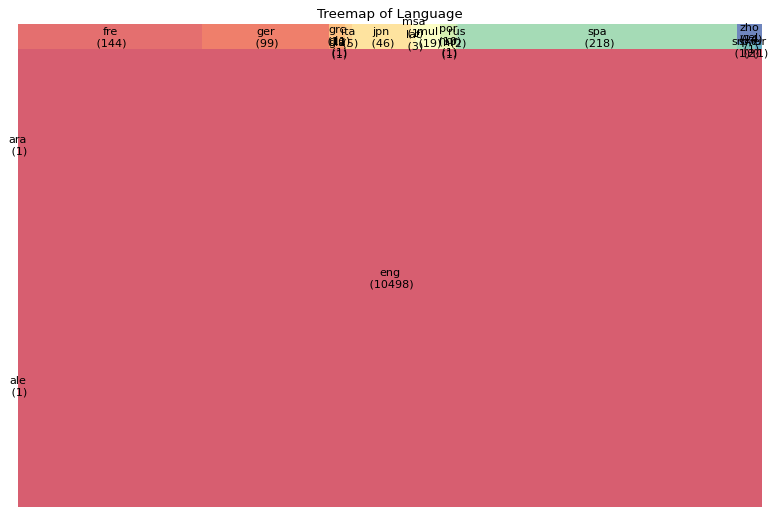

In [27]:
# Prepare Data
df_squarify1 = df_filtLang.groupby('language_code').size().reset_index(name='counts')
labels = df_squarify1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_squarify1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Language')
plt.axis('off')

plt.show()

#### Delete outliers

In order to filter the outliers, we are going to use the Z-score method.
Here is an explanation of the process:

*Z-score is just another form of standard deviation procedure. Z-score is used to convert the data into another dataset with mean = 0.
Once the data is converted, the center becomes 0 and the z-score corresponding to each data point represents the distance from the center in terms of standard deviation. For example, a z-score of 2.5 indicates that the data point is 2.5 standard deviation away from the mean. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method.*
[Source: TowardsDataScience](https://https://towardsdatascience.com/outlier-detection-part1-821d714524c)





In [28]:
print(df_filtLang.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [29]:
z=np.abs(stats.zscore(df_filtLang['num_pages']))
np.where(z > 3)

(array([   19,    21,   170,   185,   198,   230,   232,   264,   332,
          403,   417,   418,   592,   623,   624,   645,   664,   666,
          699,   710,   712,   719,   721,   808,   813,   903,  1000,
         1002,  1051,  1052,  1098,  1099,  1101,  1144,  1172,  1364,
         1515,  1535,  1565,  1569,  1587,  1619,  1689,  1744,  1760,
         1819,  1953,  1973,  1977,  1979,  1981,  1982,  2529,  2530,
         2531,  2532,  2546,  2553,  2617,  2732,  2857,  2947,  2955,
         2957,  3077,  3166,  3228,  3274,  3387,  3393,  3394,  3397,
         3462,  3463,  3467,  3495,  3523,  3640,  3809,  3891,  4076,
         4142,  4240,  4253,  4301,  4302,  4423,  4441,  4656,  4685,
         4726,  4812,  4824,  4827,  4847,  5014,  5015,  5017,  5018,
         5027,  5037,  5259,  5328,  5341,  5354,  5355,  5357,  5396,
         5436,  5446,  5464,  5587,  5594,  5702,  5937,  6233,  6238,
         6275,  6279,  6322,  6424,  6426,  6472,  6561,  6776,  6777,
      

Delete outliers with Z-score method based on "*num_pages*" variable is filtering 179 outliers:

In [30]:
df_z_num_pages = df_filtLang[(np.abs(stats.zscore(df_filtLang['num_pages'])) < 3)]
df_z_num_pages

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


Before:

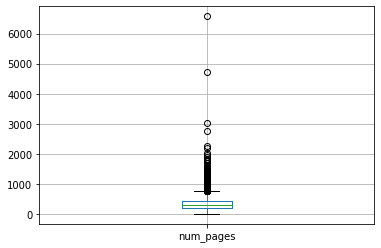

In [31]:
df_filtLang.boxplot(column=['num_pages'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/numPages_w_Outliers.png', dpi=200)

After:

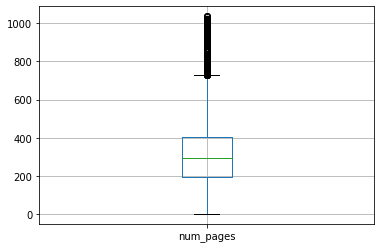

In [32]:
df_z_num_pages.boxplot(column=['num_pages'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/numPages_wo_Outliers.png', dpi=200)

Delete outliers with Z-score method based on "*ratings_count*" variable is filtering 138 outliers:

In [33]:
z_ratingCount=np.abs(stats.zscore(df_filtLang['ratings_count']))
np.where(z > 3)

(array([   19,    21,   170,   185,   198,   230,   232,   264,   332,
          403,   417,   418,   592,   623,   624,   645,   664,   666,
          699,   710,   712,   719,   721,   808,   813,   903,  1000,
         1002,  1051,  1052,  1098,  1099,  1101,  1144,  1172,  1364,
         1515,  1535,  1565,  1569,  1587,  1619,  1689,  1744,  1760,
         1819,  1953,  1973,  1977,  1979,  1981,  1982,  2529,  2530,
         2531,  2532,  2546,  2553,  2617,  2732,  2857,  2947,  2955,
         2957,  3077,  3166,  3228,  3274,  3387,  3393,  3394,  3397,
         3462,  3463,  3467,  3495,  3523,  3640,  3809,  3891,  4076,
         4142,  4240,  4253,  4301,  4302,  4423,  4441,  4656,  4685,
         4726,  4812,  4824,  4827,  4847,  5014,  5015,  5017,  5018,
         5027,  5037,  5259,  5328,  5341,  5354,  5355,  5357,  5396,
         5436,  5446,  5464,  5587,  5594,  5702,  5937,  6233,  6238,
         6275,  6279,  6322,  6424,  6426,  6472,  6561,  6776,  6777,
      

In [34]:
df_z_ratings_count = df_z_num_pages[(np.abs(stats.zscore(df_z_num_pages['ratings_count'])) < 2)]
df_z_ratings_count.shape

(10764, 12)

Before:

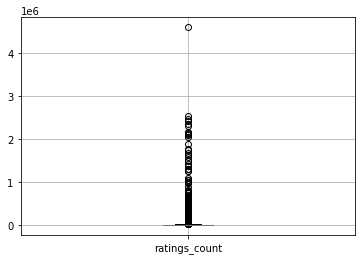

In [35]:
boxplot = df_z_num_pages.boxplot(column=['ratings_count'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/ratingsCount_w_Outliers.png', dpi=200)

After:

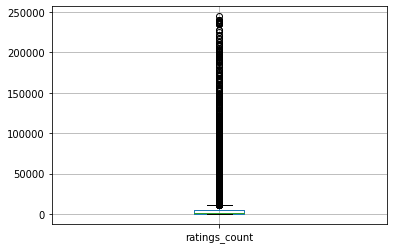

In [36]:
boxplot = df_z_ratings_count.boxplot(column=['ratings_count'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/ratingsCount_wo_Outliers.png', dpi=200)

Delete outliers with Z-score method based on "*text_reviews_count*" variable is filtering 399 outliers:

In [37]:
df_z_text_reviews_count = df_z_ratings_count[(np.abs(stats.zscore(df_z_ratings_count['text_reviews_count'])) < 2)]
df_z_text_reviews_count.shape

(10365, 12)

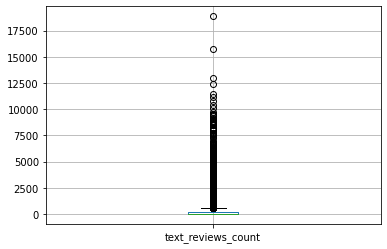

In [38]:
boxplot = df_z_ratings_count.boxplot(column=['text_reviews_count'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/textReviewsCount_w_Outliers.png', dpi=200)

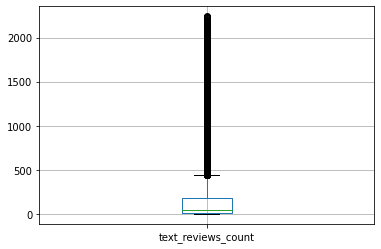

In [39]:
boxplot = df_z_text_reviews_count.boxplot(column=['text_reviews_count'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/textReviewsCount_wo_Outliers.png', dpi=200)

In [40]:
df_zFinal = df_z_text_reviews_count
df_zFinal.shape

(10365, 12)

The final dataset contains 10365 rows.

The raw dataset contained 11081 rows.

It means we filtered 716 rows (6.5% of the dataset).

#### Filter books with 0 page

Some books have 0 pages, so in my opinion it is not relevant to keep them in the dataset.

In [41]:
df_noZeroBook = df_zFinal[df_zFinal.num_pages > 0]
df_noZeroBook.shape

(10294, 12)

#### Data processed overview

In [42]:
df_raw.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In order to simplify the dataset, we are going to drop some columns.
Most of them are not relevant in my opinion, but we will see at the end and we could have keep the "*publication_date*" in some way, in order to improve our prediction model.

Here are the information we want to keep for our prediction model:

In [109]:
df_processed = df_noZeroBook.drop(columns=["title","authors","isbn","isbn13","publisher","publication_date"])
df_processed.head(5)

,bookID,average_rating,language_code,num_pages,ratings_count,text_reviews_count
2,4,4.42,eng,352,6333,244
5,9,3.74,eng,152,19,1
7,12,4.38,eng,815,3628,254
9,14,4.22,eng,215,4930,460
10,16,4.22,eng,6,1266,253


In [77]:
## No language version (lang not taking into account)
#df_processed = df_noZeroBook.drop(columns=["title","authors","isbn","isbn13","publisher","publication_date","language_code"])
#df_processed

,bookID,average_rating,num_pages,ratings_count,text_reviews_count
2,4,4.42,352,6333,244
5,9,3.74,152,19,1
7,12,4.38,815,3628,254
9,14,4.22,215,4930,460
10,16,4.22,6,1266,253
...,...,...,...,...,...
11118,45631,4.06,512,156,20
11119,45633,4.08,635,783,56
11120,45634,3.96,415,820,95
11121,45639,3.72,434,769,139


In [44]:
df_processed.shape

(10294, 6)

Save the data processed into a csv

In [45]:
df_processed.to_csv('data/processed/books_processed.csv', index=False)

## Data encoding

The idea is to convert string fields into numeric fields in order to be able to be taking into account for the ML model.

In [110]:
df_processed = pd.concat([df_processed,pd.get_dummies(df_processed.language_code, drop_first=False, prefix='lang')],axis=1).drop(columns="language_code")

In [111]:
df_processed.dtypes

bookID                  int64
average_rating        float64
num_pages               int64
ratings_count           int64
text_reviews_count      int64
lang_ale                uint8
lang_ara                uint8
lang_eng                uint8
lang_fre                uint8
lang_ger                uint8
lang_gla                uint8
lang_glg                uint8
lang_grc                uint8
lang_ita                uint8
lang_jpn                uint8
lang_lat                uint8
lang_msa                uint8
lang_mul                uint8
lang_nl                 uint8
lang_nor                uint8
lang_por                uint8
lang_rus                uint8
lang_spa                uint8
lang_srp                uint8
lang_swe                uint8
lang_tur                uint8
lang_wel                uint8
lang_zho                uint8
dtype: object

As we see, we have affected some dummy values in order to encode the different languages present in the dataset:

In [87]:
df_processed

,bookID,average_rating,num_pages,ratings_count,text_reviews_count
2,4,4.42,352,6333,244
5,9,3.74,152,19,1
7,12,4.38,815,3628,254
9,14,4.22,215,4930,460
10,16,4.22,6,1266,253
...,...,...,...,...,...
11118,45631,4.06,512,156,20
11119,45633,4.08,635,783,56
11120,45634,3.96,415,820,95
11121,45639,3.72,434,769,139


In [86]:
df_processed.isna().sum()

bookID                0
average_rating        0
num_pages             0
ratings_count         0
text_reviews_count    0
dtype: int64

In [85]:
df_processed.tail(5)

,bookID,average_rating,num_pages,ratings_count,text_reviews_count
11118,45631,4.06,512,156,20
11119,45633,4.08,635,783,56
11120,45634,3.96,415,820,95
11121,45639,3.72,434,769,139
11122,45641,3.91,272,113,12


In [78]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10294 entries, 2 to 11122
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10294 non-null  int64  
 1   average_rating      10294 non-null  float64
 2   num_pages           10294 non-null  int64  
 3   ratings_count       10294 non-null  int64  
 4   text_reviews_count  10294 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 482.5 KB


## Model training

### Linear Regression

In [118]:
df_train, df_test = train_test_split(df_processed,test_size = 0.2, random_state = 10)

In [80]:
print('Total length for the dataset processed :',len(df_processed))
print('Total length for the train dataset :',len(df_train))
print('Total length for the test dataset :',len(df_test))

Total length for the dataset processed : 10294
Total length for the train dataset : 8235
Total length for the test dataset : 2059


In [129]:
df_train

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,lang_ale,lang_ara,lang_eng,lang_fre,lang_ger,...,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel,lang_zho
7840,30225,3.92,422,37989,785,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1063,3597,4.33,334,2184,87,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9069,35347,3.65,256,2208,62,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8600,33029,3.35,120,83,6,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
162,385,3.57,67,9358,995,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10156,41091,3.83,208,38,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7971,30562,4.33,480,16,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1537,5327,4.05,160,4359,353,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7973,30569,4.29,416,7,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
# get the values of the columns for the training data
X_train = df_train.iloc[:, 2:].values
y_train = df_train.average_rating.values

In [131]:
X_train

array([[  422, 37989,   785, ...,     0,     0,     0],
       [  334,  2184,    87, ...,     0,     0,     0],
       [  256,  2208,    62, ...,     0,     0,     0],
       ...,
       [  160,  4359,   353, ...,     0,     0,     0],
       [  416,     7,     2, ...,     0,     0,     0],
       [  336,  3266,   163, ...,     0,     0,     0]])

In [121]:
y_train

array([3.92, 4.33, 3.65, ..., 4.05, 4.29, 4.19])

In [132]:
# get the values of the columns for the test data
X_test = df_test.iloc[:, 2:].values
y_test = df_test.average_rating.values

In [94]:
X_test

array([[ 167,    2,    1],
       [ 252,    9,    1],
       [ 745, 3001,  182],
       ...,
       [ 456,   51,    2],
       [ 230,  416,   65],
       [ 557, 3243,  172]])

In [95]:
y_test

array([3.59, 4.  , 4.02, ..., 3.87, 4.03, 4.35])

In [123]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [124]:
# here we train the model on the training data
predictions = lr.predict(X_test)

In [125]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()})
pred.head(20)

,Actual,Predicted
0,3.59,3.892444
1,4.00,3.908703
2,4.02,3.999251
3,3.77,3.943638
4,4.20,3.895675
5,4.21,3.909830
6,3.75,3.948307
7,4.04,4.002012
8,3.83,3.931505
9,3.76,3.934251


In [126]:
abs(predictions - y_test).sum()/len(y_test)

0.22825432488172592

### Neural Network

In [133]:
model2 = Sequential()
model2.add(Dense(128, input_dim=26, activation='relu', name='dense_layer_1'))
model2.add(Dense(64, activation='relu', name='dense_layer_2'))
model2.add(Dense(1, activation='linear', name='dense_output'))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 128)               3456      
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________


In [134]:
#Train
history = model2.fit(X_train, y_train, epochs=40, verbose=2, batch_size=10)

Epoch 1/40
824/824 - 2s - loss: 18639.9023 - 2s/epoch - 2ms/step
Epoch 2/40
824/824 - 1s - loss: 10178.7490 - 1s/epoch - 2ms/step
Epoch 3/40
824/824 - 2s - loss: 27786.0117 - 2s/epoch - 2ms/step
Epoch 4/40
824/824 - 2s - loss: 203.1661 - 2s/epoch - 2ms/step
Epoch 5/40
824/824 - 2s - loss: 7996.2798 - 2s/epoch - 2ms/step
Epoch 6/40
824/824 - 2s - loss: 152.1767 - 2s/epoch - 2ms/step
Epoch 7/40
824/824 - 2s - loss: 7.6579 - 2s/epoch - 2ms/step
Epoch 8/40
824/824 - 2s - loss: 2842.6362 - 2s/epoch - 2ms/step
Epoch 9/40
824/824 - 2s - loss: 6.2733 - 2s/epoch - 2ms/step
Epoch 10/40
824/824 - 2s - loss: 10911.4277 - 2s/epoch - 2ms/step
Epoch 11/40
824/824 - 2s - loss: 35.2234 - 2s/epoch - 2ms/step
Epoch 12/40
824/824 - 1s - loss: 99.2736 - 1s/epoch - 2ms/step
Epoch 13/40
824/824 - 2s - loss: 18.3929 - 2s/epoch - 2ms/step
Epoch 14/40
824/824 - 2s - loss: 8.4884 - 2s/epoch - 2ms/step
Epoch 15/40
824/824 - 2s - loss: 202.9455 - 2s/epoch - 2ms/step
Epoch 16/40
824/824 - 2s - loss: 14.0743 - 2s/ep

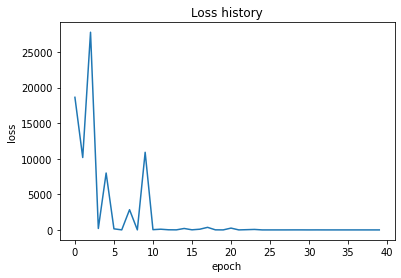

In [135]:
plt.plot(history.history['loss'])
plt.title('Loss history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Model evaluation

### Linear Regression

In [104]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.23003422062783369
MSE: 0.12291230458338738
RMSE: 0.3505885117675526


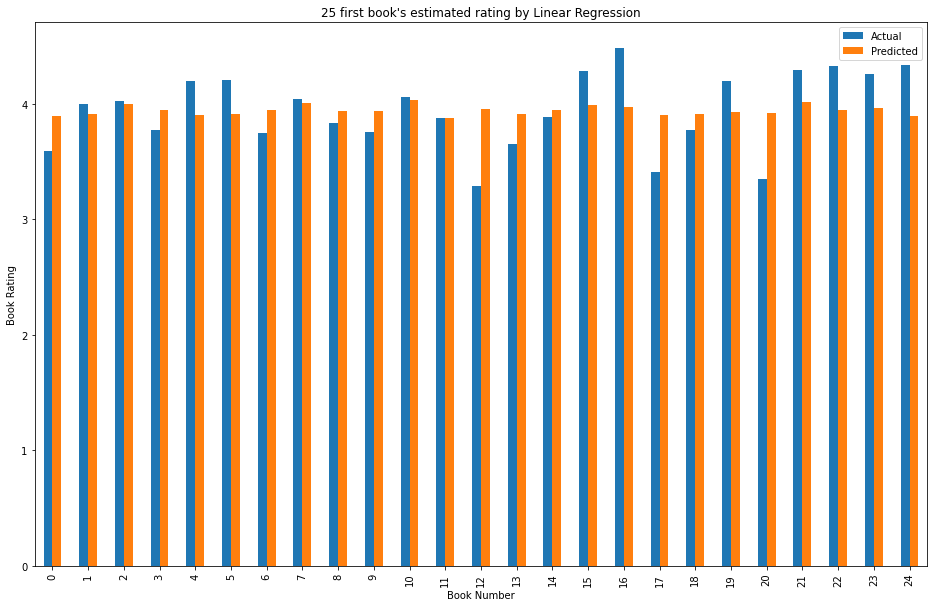

In [105]:
pred = pred.head(25)
pred.plot(kind='bar', figsize=(16, 10))

# Display labels and title
plt.title("25 first book's estimated rating by Linear Regression")
plt.xlabel("Book Number")
plt.ylabel("Book Rating")

# Save the plot
plt.savefig('reports/figures/LinearRegression_pred.png', dpi=200)

We can observe that the predicted value is not fluctuating a lot, and is around the mean value. That's why the MAE is around 4% of error, but we can observe some important differences between actual rating and predicted value (books 4/5/12/15/16/17/19/20/21/22/24)

### Neural Network

In [139]:
#Model evaluation
loss = model2.evaluate(X_test, y_test)
print('Mean squared error on test data: ', loss)

65/65 [==============================] - 0s 2ms/step - loss: 0.1254
Mean squared error on test data:  0.12543095648288727


In [138]:
# here we train the model on the training data
predictions2 = model2.predict(X_test)
predictions2

array([[3.4948297],
       [3.8730044],
       [4.2262683],
       ...,
       [3.9082499],
       [3.8472934],
       [4.066708 ]], dtype=float32)

In [147]:
predictions2

array([3.4948297], dtype=float32)

In [137]:
pred2 = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions2.tolist()})
pred2.head(20)

,Actual,Predicted
0,3.59,[3.4948296546936035]
1,4.00,[3.87300443649292]
2,4.02,[4.226268291473389]
3,3.77,[3.9250576496124268]
4,4.20,[3.597550630569458]
5,4.21,[3.8734426498413086]
6,3.75,[3.8366739749908447]
7,4.04,[4.035560131072998]
8,3.83,[3.976442337036133]
9,3.76,[3.820765256881714]


## Save Neural Network Model



In [140]:
# Save the entire model as a SavedModel.
# !mkdir -p saved_model
model2.save('models/books.h5')  

## Areas of improvement

- Tenir compte de la date Include dates into the processed dataframe to improve the prediction

- Normalize the data before doing the neural network model